December: Original attempt at extracting rims. Realistic is not as clean as Ideal.

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
from salishsea_tools.nc_tools import scDataset
import os,sys,fnmatch,time
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/transport_fluxes/')
import functions_transport_W
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

In [2]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'

filename = '1_mesh_mask.nc'
gdepwI, tmaskI, mbathyI, e1tI, e2tI = functions_transport_W.get_variables_planes(dirname, filename)

filename = '1_mesh_mask_nocanyon.nc'
gdepwIn, tmaskIn, mbathyIn, e1tIn, e2tIn = functions_transport_W.get_variables_planes(dirname, filename)

#--------------------------------------------------------------------------------------------------

dirname = '/ocean/imachuca/Canyons/results_mackenzie/realistic/sbcana_forcings/agrif_wind_timestep/'

filename = 'canyoncase/1_mesh_mask.nc'
gdepwR, tmaskR, mbathyR, e1tR, e2tR = functions_transport_W.get_variables_planes(dirname, filename)

filename = 'nocanyon/1_mesh_mask.nc'
gdepwRn, tmaskRn, mbathyRn, e1tRn, e2tRn = functions_transport_W.get_variables_planes(dirname, filename)


In [3]:
def format_ax(ax, var):
    ax.set_ylim([0, var.shape[-2]])
    ax.set_xlim([0, var.shape[-1]])

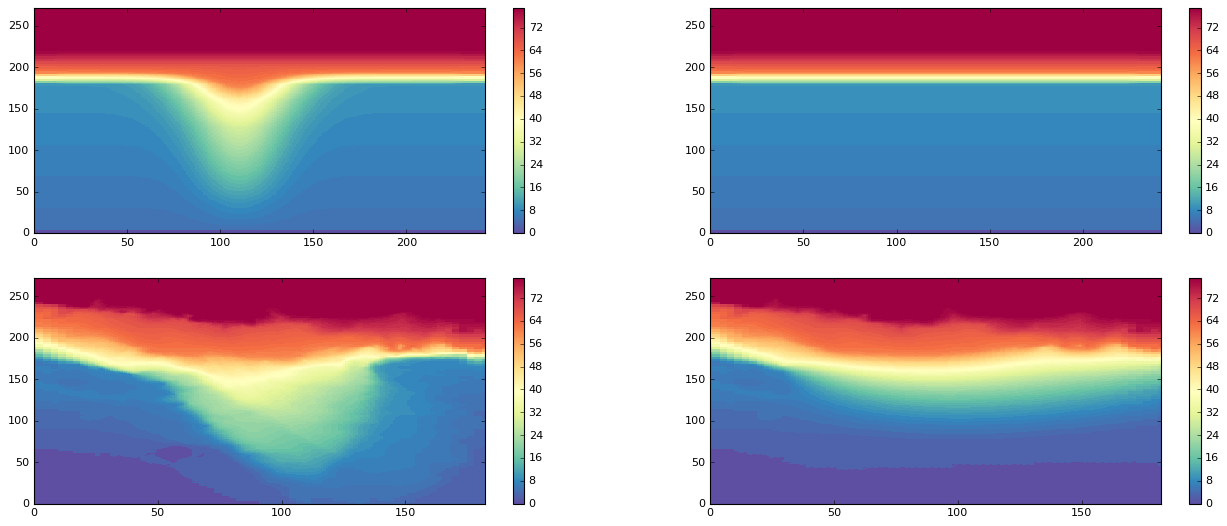

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
for ax, n, this in zip(axes.flatten(), np.arange(4), [mbathyI, mbathyIn, mbathyR, mbathyRn]):
    p = ax.pcolormesh(this, cmap=cm.Spectral_r)
    format_ax(ax, this)
    fig.colorbar(p, ax=ax)

In [11]:
mbathy_diffI = mbathyI - mbathyIn
mbathy_diffR = mbathyR - mbathyRn

In [54]:
ysI = np.where(mbathy_diffI == 3)[0]
xsI = np.where(mbathy_diffI == 3)[1]

ysR = np.where(mbathy_diffR == 5)[0]
xsR = np.where(mbathy_diffR == 5)[1]

ysI.shape, xsR.shape

((1382,), (2043,))

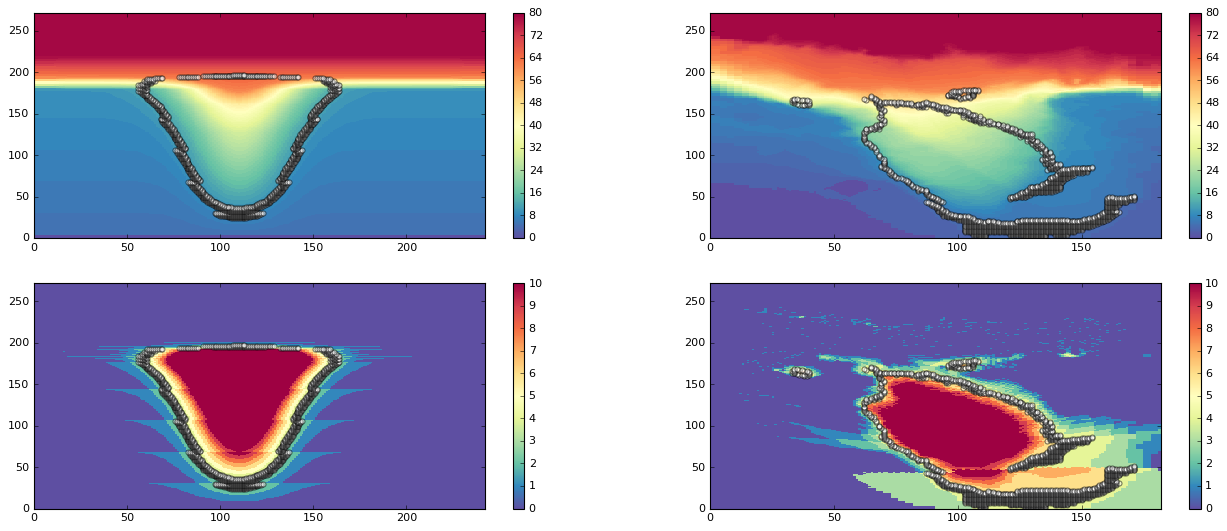

In [55]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(20, 8))
these = [mbathyI, mbathyR, mbathy_diffI, mbathy_diffR]
vmaxs = [80, 80, 10, 10]
for ax, n, this, vmax in zip([ax1, ax2, ax3, ax4], np.arange(4), these, vmaxs):
    p = ax.pcolormesh(this, cmap=cm.Spectral_r, vmin=0, vmax=vmax)
    format_ax(ax, this)
    fig.colorbar(p, ax=ax)
    if ax == ax1 or ax == ax3:
        ax.scatter(xsI, ysI, c='w', alpha=0.5)
    if ax == ax2 or ax == ax4:
        ax.scatter(xsR, ysR, c='w', alpha=0.5)